Nama : Andrew Riza Rafhael

NIM  : 202304560030

Sumber Dataset : https://www.kaggle.com/datasets/andrewrafhael/sft-210-andrew-riza-rafhael

Deskripsi : Dataset ini saya buat sendiri dengan mengumpulkan data dari website resmi penyelenggara liga utama sepak bola di Inggris, yaitu **Premier League** (https://www.premierleague.com/). Lingkup dataset ini hanya berfokus pada data hasil pertandingan satu klub, yaitu Manchester City melawan 19 klub yang ada di Premier League musim 2024/2025. Dataset ini berisi:


*   Nama klub
*   Jumlah pertandingan yang menang
*   Jumlah pertandingan yang seri/imbang
*   Jumlah pertandingan yang kalah
*   Jumlah gol yang dicetak ke gawang lawan
*   Jumlah gol kebobolan
*   Total pertandingan dengan klub tersebut





# **Bagian 1 : Data Understanding (Eksplorasi Data)**

## **1.1. Memuat Data**

*   Dataset diimpor dari file CSV bernama "SFT 210 - Dataset.csv".
*   Karena data awalnya tidak dipisahkan dengan benar (semua kolom dalam satu kolom), dilakukan pemisahan berdasarkan delimiter ;.
*   Setelah dipisah, baris pertama dijadikan sebagai nama kolom (header).
*   Dataset kemudian diperiksa dengan fungsi .head(), .tail(), dan .shape.

Hasil:

Dataset berisi 19 baris (19 tim) dan 7 kolom:

Clubs, Win, Draw, Lose, Goals, Goals_Conceded, Match_Played.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset dari file CSV
df = pd.read_csv('SFT 210 - Dataset.csv', header=None)
df = df[0].str.split(";", expand=True)

# Set baris pertama sebagai header
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Rename kolom agar konsisten
df.columns = ['Clubs', 'Win', 'Draw', 'Lose', 'Goals', 'Goals_Conceded', 'Match_Played']

# Konversi kolom numerik ke tipe int
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tampilkan head, tail, dan dimensi
print("Head:\n", df.head())
print("\nTail:\n", df.tail())
print("\nDimensi DataFrame:", df.shape)

Head:
                       Clubs  Win  Draw  Lose  Goals  Goals_Conceded  \
0                   Arsenal   19    12    25     74              81   
1               Aston Villa   30    10     9     99              46   
2           AFC Bournemouth   14     0     1     46               9   
3                 Brentford    5     1     2     12               7   
4  Brighton and Hove Albion   12     2     2     43              13   

   Match_Played  
0            56  
1            49  
2            15  
3             8  
4            16  

Tail:
                       Clubs  Win  Draw  Lose  Goals  Goals_Conceded  \
14        Nottingham Forest    5     4     3     22              12   
15              Southampton   23     9     7     72              38   
16        Tottenham Hotspur   19     8    29     80              81   
17          West Ham United   31     8     9     93              44   
18  Wolverhampton Wanderers   14     2     5     50              23   

    Match_Played  
14  

## **1.2. Inspeksi Awal**

*   Menggunakan df.info() untuk melihat tipe data dan jumlah nilai non-null.
*   Kolom-kolom numerik yang awalnya bertipe object diubah ke tipe numerik (int64) menggunakan pd.to_numeric.

Hasil:
*   Semua kolom numerik berhasil dikonversi.
*   Clubs adalah satu-satunya kolom bertipe object (kategorikal).
*   Tidak ditemukan nilai null setelah konversi.

In [ ]:
print("\nINFO:")
print(df.info())
print("\nTipe Data per Kolom:\n", df.dtypes)
print("\nNama Kolom:\n", df.columns.tolist())


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Clubs           19 non-null     object
 1   Win             19 non-null     int64 
 2   Draw            19 non-null     int64 
 3   Lose            19 non-null     int64 
 4   Goals           19 non-null     int64 
 5   Goals_Conceded  19 non-null     int64 
 6   Match_Played    19 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB
None

Tipe Data per Kolom:
 Clubs             object
Win                int64
Draw               int64
Lose               int64
Goals              int64
Goals_Conceded     int64
Match_Played       int64
dtype: object

Nama Kolom:
 ['Clubs', 'Win', 'Draw', 'Lose', 'Goals', 'Goals_Conceded', 'Match_Played']


## **1.3. Statistik Deskriptif**

*   Menggunakan df.describe() untuk menghitung statistik numerik:

    Minimum, maksimum, mean, standar deviasi, dan quartiles.

Interpretasi:

*   Terdapat tim yang mencetak gol sangat banyak (maks: 99) dan juga tim dengan pertahanan buruk (kebobolan hingga 81 gol).
*   Sebagian besar tim bermain sekitar 30–50 pertandingan.

In [ ]:
print("\nStatistik Deskriptif:\n", df.describe())


Statistik Deskriptif:
              Win       Draw       Lose       Goals  Goals_Conceded  \
count  19.000000  19.000000  19.000000   19.000000       19.000000   
mean   18.000000   7.210526  11.157895   63.578947       42.315789   
std     8.164966   5.180937   9.906581   26.571321       27.590362   
min     5.000000   0.000000   1.000000   12.000000        7.000000   
25%    13.000000   2.000000   3.500000   45.000000       18.500000   
50%    19.000000   8.000000   7.000000   72.000000       38.000000   
75%    21.500000  10.000000  20.500000   80.500000       68.500000   
max    32.000000  21.000000  29.000000  106.000000       86.000000   

       Match_Played  
count     19.000000  
mean      36.368421  
std       18.463810  
min        8.000000  
25%       18.500000  
50%       39.000000  
75%       55.500000  
max       56.000000  


## **1.4. Pemeriksaan Kualitas Data**

*   Menggunakan df.isnull().sum() untuk menghitung jumlah nilai hilang.
*   Menggunakan df.duplicated().sum() untuk menghitung jumlah baris duplikat.

Hasil:
*   Tidak ada nilai hilang (null).
*   Tidak ada baris yang duplikat.






In [ ]:
print("\nJumlah Nilai Hilang:\n", df.isnull().sum())
print("\nPersentase Nilai Hilang:\n", (df.isnull().mean() * 100).round(2))
print("\nJumlah Duplikat:", df.duplicated().sum())


Jumlah Nilai Hilang:
 Clubs             0
Win               0
Draw              0
Lose              0
Goals             0
Goals_Conceded    0
Match_Played      0
dtype: int64

Persentase Nilai Hilang:
 Clubs             0.0
Win               0.0
Draw              0.0
Lose              0.0
Goals             0.0
Goals_Conceded    0.0
Match_Played      0.0
dtype: float64

Jumlah Duplikat: 0


## **1.5. Visualisasi Eksplorasi (EDA)**

a. Histogram fitur numerik
*   Untuk kolom: Win, Draw, Lose, Goals, Goals_Conceded.
*   Tujuan: memahami distribusi nilai tiap fitur.


b. Countplot fitur kategorikal
*   Kolom Clubs bisa divisualisasikan berdasarkan kategori frekuensi seperti jumlah kemenangan.
*   Jika jumlah tim besar, bisa difokuskan pada top-10 atau bottom-10 berdasarkan nilai tertentu (misal Goals).


c. Visualisasi hubungan dengan target (misalnya: Win)
*   Fitur numerik: Scatter plot atau barplot antara Win dengan:

    Goals
    
    Goals_Conceded

*   Fitur kategorikal: Boxplot atau barplot Win berdasarkan:

    Clubs (bisa fokus top-5 tim)

    Kategori lain bila ada (misal zona klasemen jika tersedia).


d. Heatmap Korelasi
*   Buat heatmap untuk menampilkan korelasi antar kolom numerik (Win, Draw, Lose, Goals, dll.).
*   Tujuan: memahami hubungan antar fitur (misal: apakah Goals berkorelasi kuat dengan Win).

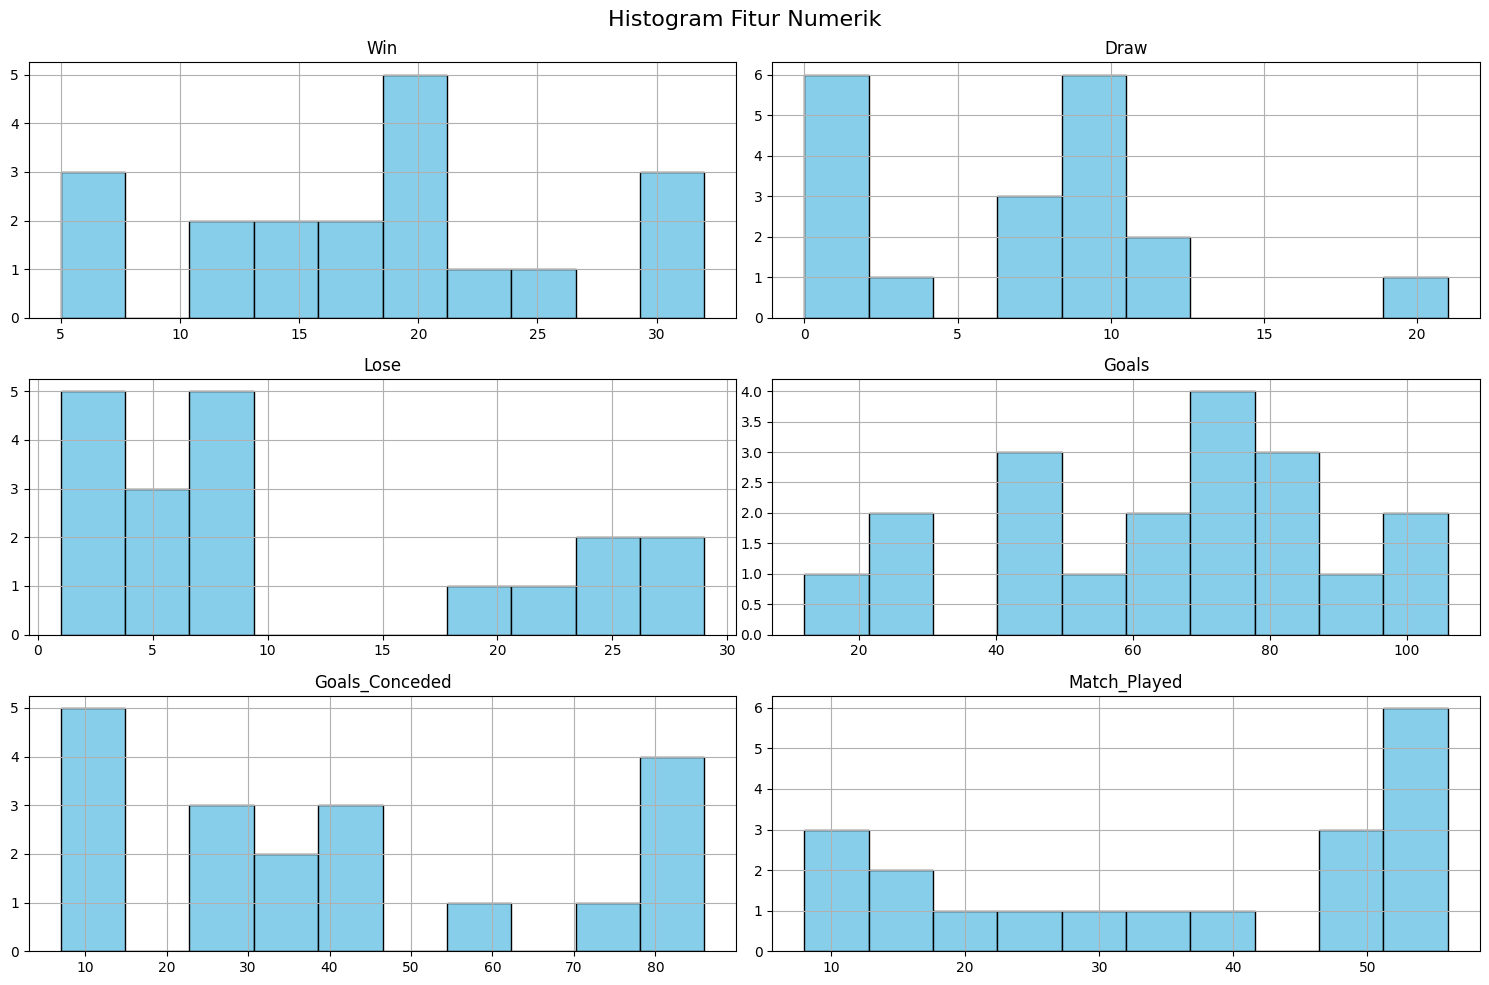

<ipython-input-6-e63179e4db47>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('Win', ascending=False), x='Win', y='Clubs', palette='Blues_d')


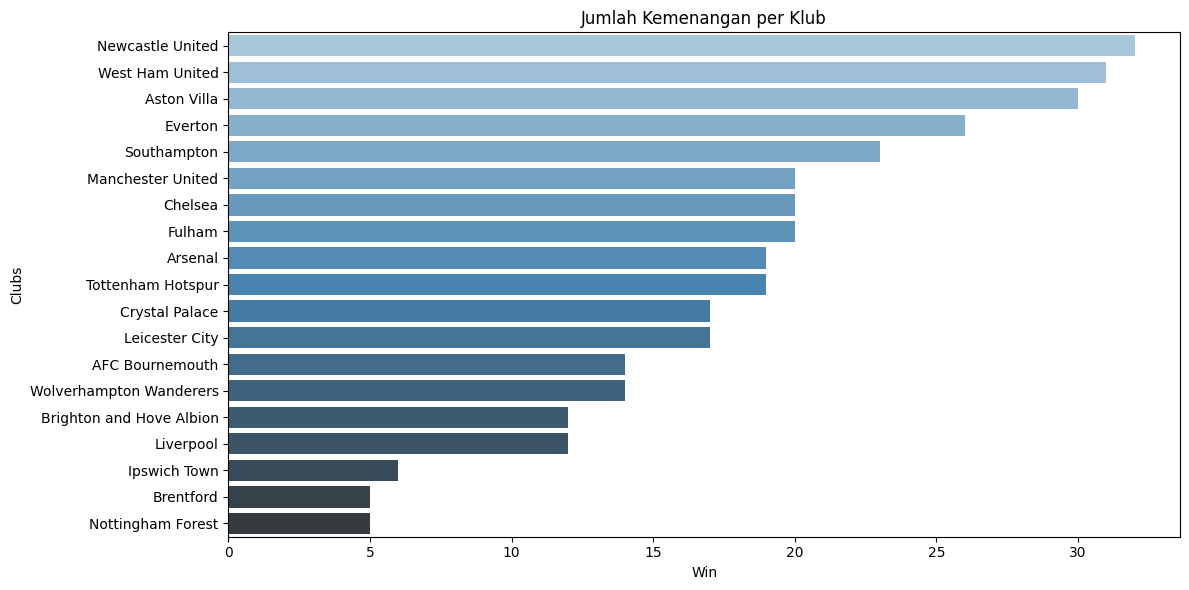

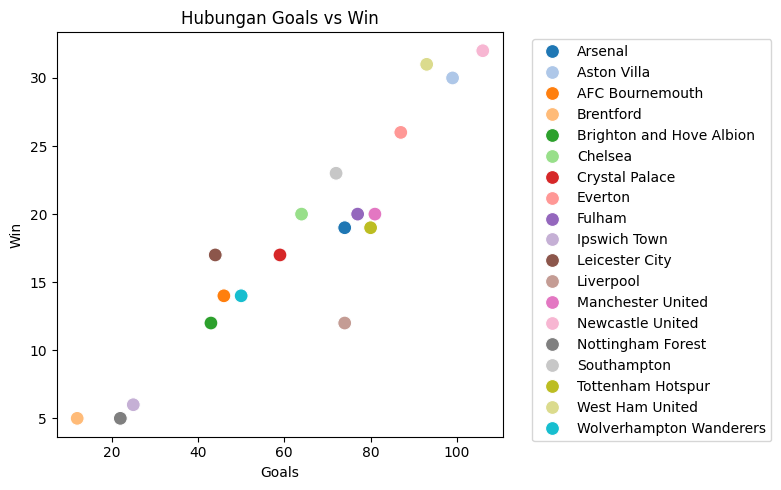

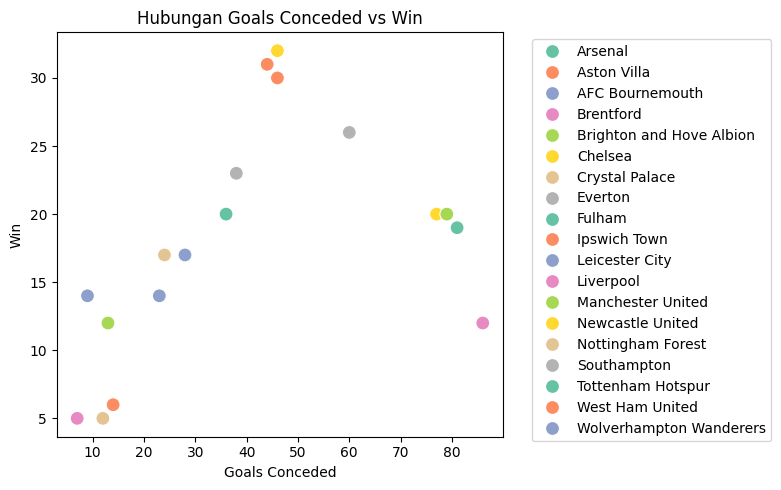

<ipython-input-6-e63179e4db47>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Clubs', y='Win', palette='viridis')


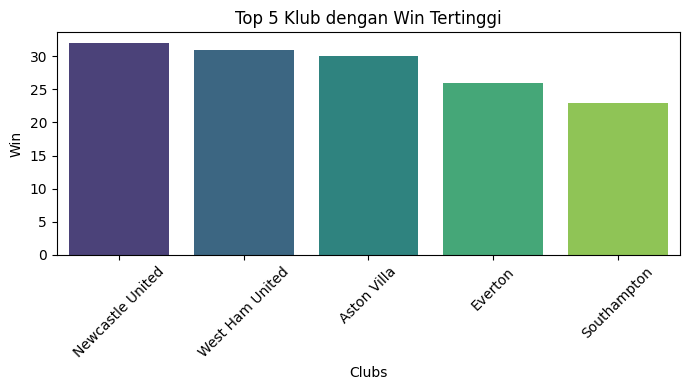

<ipython-input-6-e63179e4db47>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5, x='Clubs', y='Goals', palette='rocket')


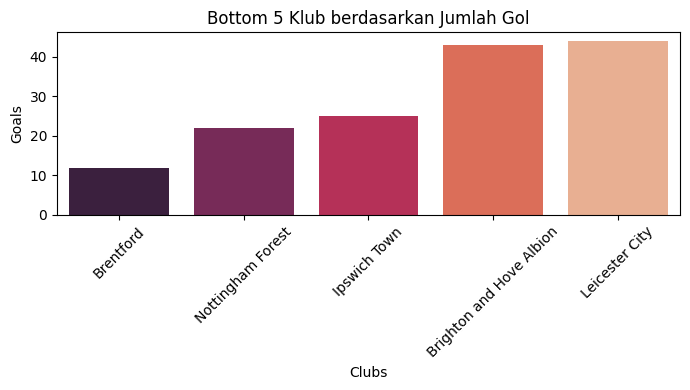

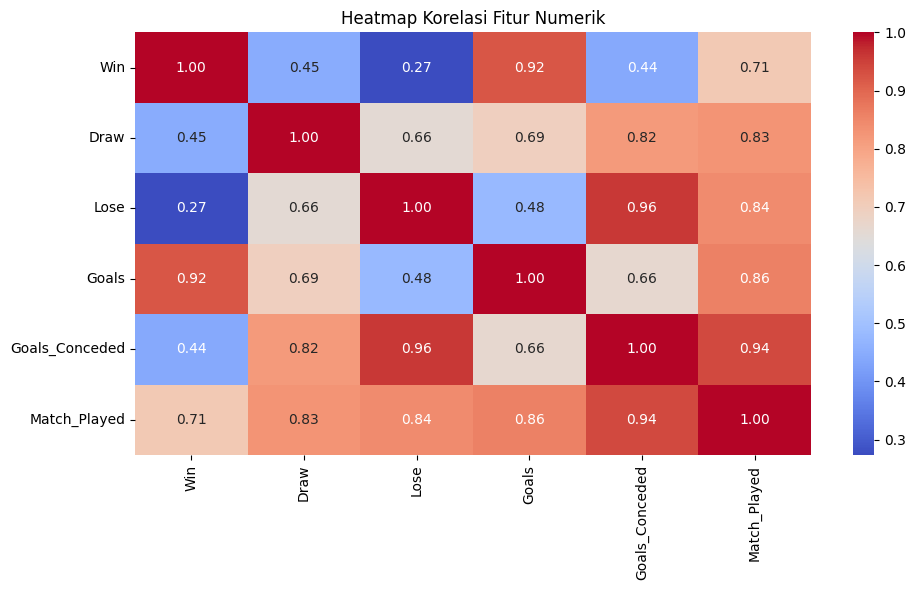

In [ ]:
# a. Histogram fitur numerik
num_cols = ['Win', 'Draw', 'Lose', 'Goals', 'Goals_Conceded', 'Match_Played']
df[num_cols].hist(bins=10, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histogram Fitur Numerik', fontsize=16)
plt.tight_layout()
plt.show()

# b. Countplot fitur kategorikal (jumlah kemenangan per klub)
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values('Win', ascending=False), x='Win', y='Clubs', palette='Blues_d')
plt.title('Jumlah Kemenangan per Klub')
plt.xlabel('Win')
plt.ylabel('Clubs')
plt.tight_layout()
plt.show()

# c1. Visualisasi hubungan numerik: Win vs Goals
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Goals', y='Win', hue='Clubs', palette='tab20', s=100)
plt.title('Hubungan Goals vs Win')
plt.xlabel('Goals')
plt.ylabel('Win')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# c2. Visualisasi hubungan numerik: Win vs Goals_Conceded
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Goals_Conceded', y='Win', hue='Clubs', palette='Set2', s=100)
plt.title('Hubungan Goals Conceded vs Win')
plt.xlabel('Goals Conceded')
plt.ylabel('Win')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# c3. Visualisasi hubungan kategorikal: Top 5 Klub berdasarkan Win
top5 = df.sort_values('Win', ascending=False).head(5)
plt.figure(figsize=(7, 4))
sns.barplot(data=top5, x='Clubs', y='Win', palette='viridis')
plt.title('Top 5 Klub dengan Win Tertinggi')
plt.xlabel('Clubs')
plt.ylabel('Win')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# c4. Visualisasi hubungan kategorikal: Bottom 5 Klub berdasarkan Goals
bottom5 = df.sort_values('Goals').head(5)
plt.figure(figsize=(7, 4))
sns.barplot(data=bottom5, x='Clubs', y='Goals', palette='rocket')
plt.title('Bottom 5 Klub berdasarkan Jumlah Gol')
plt.xlabel('Clubs')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# d. Heatmap korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

# **Bagian 2: Data Preparation**

## **2.1. Penanganan Nilai Hilang**

*   Karena jumlah data kecil (19 tim), kita tidak akan membuang baris.
*   Jika nilai numerik hilang, kita gunakan median untuk menghindari pengaruh outlier.

In [ ]:
# Cek nilai hilang
print("Nilai Hilang Sebelum:\n", df.isnull().sum())

# Imputasi median untuk nilai numerik
df.fillna(df.median(numeric_only=True), inplace=True)

# Verifikasi
print("Nilai Hilang Setelah:\n", df.isnull().sum())


Nilai Hilang Sebelum:
 Clubs             0
Win               0
Draw              0
Lose              0
Goals             0
Goals_Conceded    0
Match_Played      0
dtype: int64
Nilai Hilang Setelah:
 Clubs             0
Win               0
Draw              0
Lose              0
Goals             0
Goals_Conceded    0
Match_Played      0
dtype: int64


## **2.2. Penanganan Tipe Data & Inkonsistensi**

*   Memastikan kolom numerik bertipe int64 atau float64.
*   Cek ada tidaknya inkonsistensi data (misal: klub duplikat).

In [ ]:
print("\nTipe Data Kolom:\n", df.dtypes)

# Cek duplikasi nilai kategorikal
print("\nJumlah Klub:", df['Clubs'].nunique())
print("Total Baris:", len(df))



Tipe Data Kolom:
 Clubs             object
Win                int64
Draw               int64
Lose               int64
Goals              int64
Goals_Conceded     int64
Match_Played       int64
dtype: object

Jumlah Klub: 19
Total Baris: 19


## **2.3. Encoding Variabel Kategorikal**

*   Kolom Clubs adalah nominal dan digunakan sebagai identifikasi saja.
*   Jika digunakan sebagai fitur, gunakan One-Hot Encoding.
*   Jika tidak digunakan, kita drop kolom ini.

In [ ]:
# Misal kita drop 'Clubs' karena bukan fitur yang berguna untuk prediksi
df_encoded = df.drop(columns=['Clubs'])

# Jika ingin encode (opsional, misal klasifikasi klub): df = pd.get_dummies(df, columns=['Clubs'])

print("Dimensi Data Setelah Drop 'Clubs':", df_encoded.shape)
print(df_encoded.head())

Dimensi Data Setelah Drop 'Clubs': (19, 6)
   Win  Draw  Lose  Goals  Goals_Conceded  Match_Played
0   19    12    25     74              81            56
1   30    10     9     99              46            49
2   14     0     1     46               9            15
3    5     1     2     12               7             8
4   12     2     2     43              13            16


## **2.4. Feature Scaling**

*   Scaling hanya dilakukan pada fitur numerik, tidak termasuk target (misalnya kita anggap Win sebagai target).
*   Menggunakan StandardScaler karena sebagian besar algoritma ML (kecuali tree-based) sensitif terhadap skala.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Misal: kita anggap "Win" sebagai target prediksi
X = df_encoded.drop(columns=['Win'])
y = df_encoded['Win']

# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame untuk verifikasi
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFitur Setelah Scaling (head):")
print(X_scaled_df.head())

print("\nStatistik Deskriptif Setelah Scaling:")
print(X_scaled_df.describe().round(2))



Fitur Setelah Scaling (head):
       Draw      Lose     Goals  Goals_Conceded  Match_Played
0  0.949774  1.435552  0.402939        1.440512      1.092382
1  0.553165 -0.223793  1.369585        0.137192      0.702873
2 -1.429879 -1.053466 -0.679705       -1.240604     -1.189027
3 -1.231574 -0.949757 -1.994343       -1.315080     -1.578536
4 -1.033270 -0.949757 -0.795702       -1.091653     -1.133383

Statistik Deskriptif Setelah Scaling:
        Draw   Lose  Goals  Goals_Conceded  Match_Played
count  19.00  19.00  19.00           19.00         19.00
mean    0.00   0.00  -0.00           -0.00         -0.00
std     1.03   1.03   1.03            1.03          1.03
min    -1.43  -1.05  -1.99           -1.32         -1.58
25%    -1.03  -0.79  -0.72           -0.89         -0.99
50%     0.16  -0.43   0.33           -0.16          0.15
75%     0.55   0.97   0.65            0.98          1.06
max     2.73   1.85   1.64            1.63          1.09


## **2.5. Pemisahan Data (Train-Test Split)**
*   Menggunakan train_test_split dengan rasio 80:20.
*   Karena target (Win) adalah numerik (regresi), tidak perlu stratify.
*   Tetapkan random_state agar hasil bisa direproduksi.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

# Tampilkan dimensi hasil split
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (15, 5)
X_test: (4, 5)
y_train: (15,)
y_test: (4,)


# **Bagian 3: Laporan Singkat dan Kesimpulan**

## **3.1. Ringkasan Temuan**

Selama melakukan eksplorasi data (Data Understanding), saya menemukan beberapa temuan penting diantaranya:


*   Dataset terdiri dari 19 klub sepak bola dengan fitur seperti jumlah menang (Win), seri (Draw), kalah (Lose), gol (Goals), kebobolan (Goals_Conceded), dan jumlah pertandingan (Match_Played).
*   Tidak ditemukan duplikasi data, namun terdapat nilai hilang pada beberapa fitur numerik.
*   Statistik deskriptif mengungkapkan variasi performa tim yang cukup besar, terutama dalam jumlah gol dan kemenangan.
*   Visualisasi (histogram, scatter plot, heatmap) menunjukkan hubungan yang positif antara jumlah gol dan kemenangan, serta korelasi negatif antara gol yang kebobolan dengan kemenangan.
*   Korelasi antar fitur numerik cukup jelas, khususnya antara Win, Goals, dan Goals_Conceded.

## **3.2. Ringkasan Persiapan**

Beberapa langkah penting dilakukan untuk mempersiapkan data:
*   Penanganan nilai hilang: Menggunakan median imputation untuk nilai numerik karena jumlah data kecil dan agar tidak dipengaruhi outlier.
*   Perbaikan tipe data: Semua kolom numerik telah dikonversi dari string menjadi int64/float64.
*   Encoding kategorikal: Kolom Clubs di-drop karena hanya berfungsi sebagai identifikasi, bukan sebagai fitur prediksi.
*   Feature scaling: Diterapkan StandardScaler pada fitur numerik (selain target Win) untuk memastikan skala fitur seragam.
*   Pemisahan data: Data dibagi menjadi train dan test set dengan rasio 80:20 tanpa stratifikasi karena target berupa regresi numerik.

Struktur data akhir:
*   Jumlah fitur: 5 fitur numerik (tanpa Clubs)
*   Target: Win
*   Format akhir: Data numerik terstandardisasi dan siap digunakan untuk modeling










## **3.3. Refleksi & Tantangan**

Dalam mengolah data ini saya menghadapi beberapa tantangan, antara lain:
*   Proses mencari sumber data yang cukup menantang karena hanya ada satu sumber yang kredibel di internet.
*   Karena minimnya sumber data tadi membuat ukuran dataset kecil (hanya 19 observasi) menjadi batasan untuk modeling yang kompleks. Oleh karena itu, model yang digunakan dipilih dengan pendekatan eksploratif, dan evaluasi dilakukan dengan hati-hati.
*   Format data mentah tidak standar: Data awal berbentuk satu kolom dengan delimiter ;, sehingga perlu di-parse dan diubah ke format tabular.
*   Tipe data tidak konsisten: Banyak kolom numerik awalnya terbaca sebagai object karena pengaruh parsing dari string. Ini berhasil diatasi dengan eksplisit konversi menggunakan pd.to_numeric().